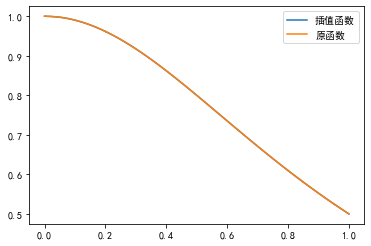

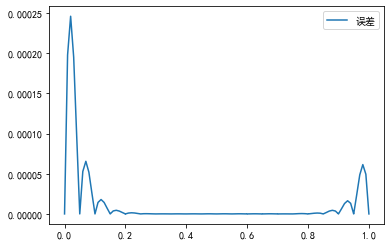

[0.00019511]
[4.86739892e-05]


In [45]:
import math
import numpy as np
import matplotlib.pyplot  as plt
from sympy import *
from pylab import mpl

def func(y):
    y = np.float64(y)
    return 1/(1 + y * y)

def draw_pic1(x, y):
    fig=plt.figure()
    plt.plot(x, y, label='插值函数')
    plt.plot(x, func(x), label='原函数')
    plt.legend()
    plt.show()
    
def draw_pic2(x, y):
    fig=plt.figure()
    plt.plot(x, np.fabs(y-func(x)), label='误差')
    plt.legend()
    plt.show()

def spline3_Parameters(x_vec):
        parameter = []
        size_of_Interval = len(x_vec) - 1;
        i = 1
        
        while i < len(x_vec) - 1:
            data = np.zeros(size_of_Interval * 4)
            data[(i - 1) * 4] = x_vec[i] * x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 1] = x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 2] = x_vec[i]
            data[(i - 1) * 4 + 3] = 1
            data1 = np.zeros(size_of_Interval * 4)
            data1[i * 4] = x_vec[i] * x_vec[i] * x_vec[i]
            data1[i * 4 + 1] = x_vec[i] * x_vec[i]
            data1[i * 4 + 2] = x_vec[i]
            data1[i * 4 + 3] = 1

            parameter.append(data)
            parameter.append(data1)
            i += 1
        
        data = np.zeros(size_of_Interval * 4)
        data[0] = x_vec[0] * x_vec[0] * x_vec[0]
        data[1] = x_vec[0] * x_vec[0]
        data[2] = x_vec[0]
        data[3] = 1
        parameter.append(data)

        data = np.zeros(size_of_Interval * 4)
        data[(size_of_Interval - 1) * 4] = x_vec[-1] * x_vec[-1] * x_vec[-1]
        data[(size_of_Interval - 1) * 4 + 1] = x_vec[-1] * x_vec[-1]
        data[(size_of_Interval - 1) * 4 + 2] = x_vec[-1]
        data[(size_of_Interval - 1) * 4 + 3] = 1
        parameter.append(data)
        
        i = 1
        while i < size_of_Interval:
            data = np.zeros(size_of_Interval * 4)
            data[(i - 1) * 4] = 3 * x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 1] = 2 * x_vec[i]
            data[(i - 1) * 4 + 2] = 1
            data[i * 4] = -3 * x_vec[i] * x_vec[i]
            data[i * 4 + 1] = -2 * x_vec[i]
            data[i * 4 + 2] = -1
            parameter.append(data)
            i += 1
        
        i = 1
        while i < len(x_vec) - 1:
            data = np.zeros(size_of_Interval * 4)
            data[(i - 1) * 4] = 6 * x_vec[i]
            data[(i - 1) * 4 + 1] = 2
            data[i * 4] = -6 * x_vec[i]
            data[i * 4 + 1] = -2
            parameter.append(data)
            i += 1
        #the other two equations
        data = np.zeros(size_of_Interval * 4)
        data[0] = 6 * x_vec[0]
        data[1] = 2
        parameter.append(data)
        data = np.zeros(size_of_Interval * 4)
        data[-4] = 6 * x_vec[-1]
        data[-3] = 2
        parameter.append(data)
        return parameter

def solution_of_equation(parametes, x):
        size_of_Interval = len(x) - 1;
        result = np.zeros(size_of_Interval * 4)
        i = 1
        while i < size_of_Interval:
            result[(i - 1) * 2] = func(x[i])
            result[(i - 1) * 2 + 1] = func(x[i])
            i += 1
        result[(size_of_Interval - 1) * 2] = func(x[0])
        result[(size_of_Interval - 1) * 2 + 1] = func(x[-1])
        result[-2] = 0
        result[-1] = 0
        a = np.array(spline3_Parameters(x))
        b = np.array(result)
        #print(b)
        return np.linalg.solve(a, b)

def calculate(paremeters, x):
        result = []
        for data_x in x:
            result.append(
                paremeters[0] * data_x * data_x * data_x + paremeters[1] * data_x * data_x + paremeters[2] * data_x +
                paremeters[3])
        return result

x_init4 = np.arange(0, 1.01, 0.05)
result = solution_of_equation(spline3_Parameters(x_init4), x_init4)
#print(spline3_Parameters(x_init4))
#print(result)
x_axis4 = []
y_axis4 = []
for i in range(20):
    temp = np.arange(i/20, 0.05 + i/20, 0.01)
    x_axis4 = np.append(x_axis4, temp)
    y_axis4 = np.append(y_axis4, calculate(
        [result[4 * i], result[1 + 4 * i], result[2 + 4 * i], result[3 + 4 * i]], temp))
draw_pic1(x_axis4, y_axis4)
draw_pic2(x_axis4, y_axis4)
print(np.fabs([result[4 * 0] * 0.03**3 + result[1 + 4 * 0] * 0.03**2 + 
               result[2 + 4 * 0] * 0.03 + result[3 + 4 * 0]] - func(0.03)))
print(np.fabs([result[4 * 19] * 0.97**3 + result[1 + 4 * 19] * 0.97**2 + 
               result[2 + 4 * 19] * 0.97 + result[3 + 4 * 19]] - func(0.97)))

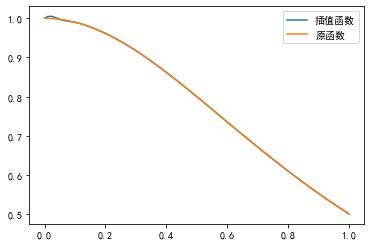

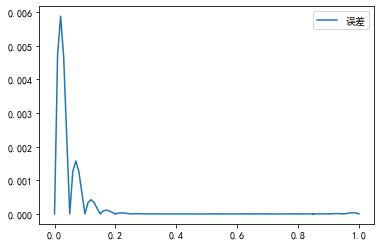

[0.0046613]
[2.82271253e-05]


In [47]:
import math
import numpy as np
import matplotlib.pyplot  as plt
from sympy import *
from pylab import mpl

def func(y):
    y = np.float64(y)
    return 1/(1 + y * y)

def draw_pic1(x, y):
    fig=plt.figure()
    plt.plot(x, y, label='插值函数')
    plt.plot(x, func(x), label='原函数')
    plt.legend()
    plt.show()
    
def draw_pic2(x, y):
    fig=plt.figure()
    plt.plot(x, np.fabs(y-func(x)), label='误差')
    plt.legend()
    plt.show()

def spline3_Parameters(x_vec):
        parameter = []
        size_of_Interval = len(x_vec) - 1;
        i = 1
        
        while i < len(x_vec) - 1:
            data = np.zeros(size_of_Interval * 4)
            data[(i - 1) * 4] = x_vec[i] * x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 1] = x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 2] = x_vec[i]
            data[(i - 1) * 4 + 3] = 1
            data1 = np.zeros(size_of_Interval * 4)
            data1[i * 4] = x_vec[i] * x_vec[i] * x_vec[i]
            data1[i * 4 + 1] = x_vec[i] * x_vec[i]
            data1[i * 4 + 2] = x_vec[i]
            data1[i * 4 + 3] = 1

            parameter.append(data)
            parameter.append(data1)
            i += 1
        
        data = np.zeros(size_of_Interval * 4)
        data[0] = x_vec[0] * x_vec[0] * x_vec[0]
        data[1] = x_vec[0] * x_vec[0]
        data[2] = x_vec[0]
        data[3] = 1
        parameter.append(data)

        data = np.zeros(size_of_Interval * 4)
        data[(size_of_Interval - 1) * 4] = x_vec[-1] * x_vec[-1] * x_vec[-1]
        data[(size_of_Interval - 1) * 4 + 1] = x_vec[-1] * x_vec[-1]
        data[(size_of_Interval - 1) * 4 + 2] = x_vec[-1]
        data[(size_of_Interval - 1) * 4 + 3] = 1
        parameter.append(data)
        
        i = 1
        while i < size_of_Interval:
            data = np.zeros(size_of_Interval * 4)
            data[(i - 1) * 4] = 3 * x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 1] = 2 * x_vec[i]
            data[(i - 1) * 4 + 2] = 1
            data[i * 4] = -3 * x_vec[i] * x_vec[i]
            data[i * 4 + 1] = -2 * x_vec[i]
            data[i * 4 + 2] = -1
            parameter.append(data)
            i += 1
        
        i = 1
        while i < len(x_vec) - 1:
            data = np.zeros(size_of_Interval * 4)
            data[(i - 1) * 4] = 6 * x_vec[i]
            data[(i - 1) * 4 + 1] = 2
            data[i * 4] = -6 * x_vec[i]
            data[i * 4 + 1] = -2
            parameter.append(data)
            i += 1
        #the other two equations
        data = np.zeros(size_of_Interval * 4)
        data[0] = 6 * x_vec[0]
        data[1] = 2
        parameter.append(data)
        data = np.zeros(size_of_Interval * 4)
        data[-4] = 6 * x_vec[-1]
        data[-3] = 2
        parameter.append(data)
        return parameter

def solution_of_equation(parametes, x):
        size_of_Interval = len(x) - 1;
        result = np.zeros(size_of_Interval * 4)
        i = 1
        while i < size_of_Interval:
            result[(i - 1) * 2] = func(x[i])
            result[(i - 1) * 2 + 1] = func(x[i])
            i += 1
        result[(size_of_Interval - 1) * 2] = func(x[0])
        result[(size_of_Interval - 1) * 2 + 1] = func(x[-1])
        result[-2] = (-50)
        result[-1] = (-50*26+5000)/26**3
        a = np.array(spline3_Parameters(x))
        b = np.array(result)
        #print(b)
        return np.linalg.solve(a, b)

def calculate(paremeters, x):
        result = []
        for data_x in x:
            result.append(
                paremeters[0] * data_x * data_x * data_x + paremeters[1] * data_x * data_x + paremeters[2] * data_x +
                paremeters[3])
        return result

x_init4 = np.arange(0, 1.01, 0.05)
result = solution_of_equation(spline3_Parameters(x_init4), x_init4)
#print(spline3_Parameters(x_init4))
#print(result)
x_axis4 = []
y_axis4 = []
for i in range(20):
    temp = np.arange(i/20, 0.05 + i/20, 0.01)
    x_axis4 = np.append(x_axis4, temp)
    y_axis4 = np.append(y_axis4, calculate(
        [result[4 * i], result[1 + 4 * i], result[2 + 4 * i], result[3 + 4 * i]], temp))
draw_pic1(x_axis4, y_axis4)
draw_pic2(x_axis4, y_axis4)
print(np.fabs([result[4 * 0] * 0.03**3 + result[1 + 4 * 0] * 0.03**2 + 
               result[2 + 4 * 0] * 0.03 + result[3 + 4 * 0]] - func(0.03)))
print(np.fabs([result[4 * 19] * 0.97**3 + result[1 + 4 * 19] * 0.97**2 + 
               result[2 + 4 * 19] * 0.97 + result[3 + 4 * 19]] - func(0.97)))

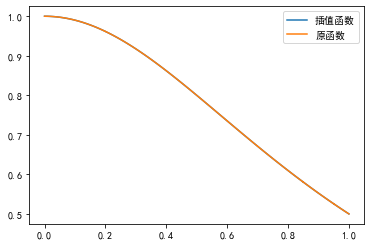

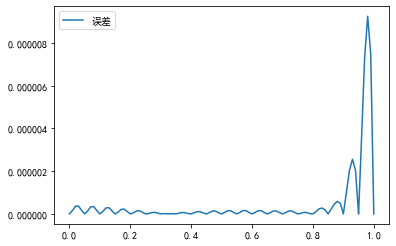

[3.64854933e-07]
[7.3229683e-06]


In [48]:
import math
import numpy as np
import matplotlib.pyplot  as plt
from sympy import *
from pylab import mpl

def func(y):
    y = np.float64(y)
    return 1/(1 + y * y)

def draw_pic1(x, y):
    fig=plt.figure()
    plt.plot(x, y, label='插值函数')
    plt.plot(x, func(x), label='原函数')
    plt.legend()
    plt.show()
    
def draw_pic2(x, y):
    fig=plt.figure()
    plt.plot(x, np.fabs(y-func(x)), label='误差')
    plt.legend()
    plt.show()

def spline3_Parameters(x_vec):
        parameter = []
        size_of_Interval = len(x_vec) - 1;
        i = 1
        
        while i < len(x_vec) - 1:
            data = np.zeros(size_of_Interval * 4)
            data[(i - 1) * 4] = x_vec[i] * x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 1] = x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 2] = x_vec[i]
            data[(i - 1) * 4 + 3] = 1
            data1 = np.zeros(size_of_Interval * 4)
            data1[i * 4] = x_vec[i] * x_vec[i] * x_vec[i]
            data1[i * 4 + 1] = x_vec[i] * x_vec[i]
            data1[i * 4 + 2] = x_vec[i]
            data1[i * 4 + 3] = 1

            parameter.append(data)
            parameter.append(data1)
            i += 1
        
        data = np.zeros(size_of_Interval * 4)
        data[0] = x_vec[0] * x_vec[0] * x_vec[0]
        data[1] = x_vec[0] * x_vec[0]
        data[2] = x_vec[0]
        data[3] = 1
        parameter.append(data)

        data = np.zeros(size_of_Interval * 4)
        data[(size_of_Interval - 1) * 4] = x_vec[-1] * x_vec[-1] * x_vec[-1]
        data[(size_of_Interval - 1) * 4 + 1] = x_vec[-1] * x_vec[-1]
        data[(size_of_Interval - 1) * 4 + 2] = x_vec[-1]
        data[(size_of_Interval - 1) * 4 + 3] = 1
        parameter.append(data)
        
        i = 1
        while i < size_of_Interval:
            data = np.zeros(size_of_Interval * 4)
            data[(i - 1) * 4] = 3 * x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 1] = 2 * x_vec[i]
            data[(i - 1) * 4 + 2] = 1
            data[i * 4] = -3 * x_vec[i] * x_vec[i]
            data[i * 4 + 1] = -2 * x_vec[i]
            data[i * 4 + 2] = -1
            parameter.append(data)
            i += 1
        
        i = 1
        while i < len(x_vec) - 1:
            data = np.zeros(size_of_Interval * 4)
            data[(i - 1) * 4] = 6 * x_vec[i]
            data[(i - 1) * 4 + 1] = 2
            data[i * 4] = -6 * x_vec[i]
            data[i * 4 + 1] = -2
            parameter.append(data)
            i += 1
        #the other two equations
        data = np.zeros(size_of_Interval * 4)
        data[0] = 3 * x_vec[0] * x_vec[0]
        data[1] = 2 * x_vec[0]
        data[2] = 1
        parameter.append(data)
        data = np.zeros(size_of_Interval * 4)
        data[-4] = 3 * x_vec[0] * x_vec[0]
        data[-3] = 2 * x_vec[0]
        data[-2] = 1
        parameter.append(data)
        return parameter

def solution_of_equation(parametes, x):
        size_of_Interval = len(x) - 1;
        result = np.zeros(size_of_Interval * 4)
        i = 1
        while i < size_of_Interval:
            result[(i - 1) * 2] = func(x[i])
            result[(i - 1) * 2 + 1] = func(x[i])
            i += 1
        result[(size_of_Interval - 1) * 2] = func(x[0])
        result[(size_of_Interval - 1) * 2 + 1] = func(x[-1])
        result[-2] = 0
        result[-1] = (-50)/26**2
        a = np.array(spline3_Parameters(x))
        b = np.array(result)
        #print(b)
        return np.linalg.solve(a, b)

def calculate(paremeters, x):
        result = []
        for data_x in x:
            result.append(
                paremeters[0] * data_x * data_x * data_x + paremeters[1] * data_x * data_x + paremeters[2] * data_x +
                paremeters[3])
        return result

x_init4 = np.arange(0, 1.01, 0.05)
result = solution_of_equation(spline3_Parameters(x_init4), x_init4)
#print(spline3_Parameters(x_init4))
#print(result)
x_axis4 = []
y_axis4 = []
for i in range(20):
    temp = np.arange(i/20, 0.05 + i/20, 0.01)
    x_axis4 = np.append(x_axis4, temp)
    y_axis4 = np.append(y_axis4, calculate(
        [result[4 * i], result[1 + 4 * i], result[2 + 4 * i], result[3 + 4 * i]], temp))
draw_pic1(x_axis4, y_axis4)
draw_pic2(x_axis4, y_axis4)
print(np.fabs([result[4 * 0] * 0.03**3 + result[1 + 4 * 0] * 0.03**2 + 
               result[2 + 4 * 0] * 0.03 + result[3 + 4 * 0]] - func(0.03)))
print(np.fabs([result[4 * 19] * 0.97**3 + result[1 + 4 * 19] * 0.97**2 + 
               result[2 + 4 * 19] * 0.97 + result[3 + 4 * 19]] - func(0.97)))

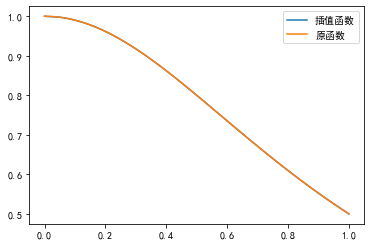

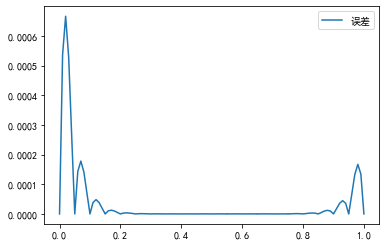

[0.00052843]
[0.00013238]


In [49]:
import math
import numpy as np
import matplotlib.pyplot  as plt
from sympy import *
from pylab import mpl

def func(y):
    y = np.float64(y)
    return 1/(1 + y * y)

def draw_pic1(x, y):
    fig=plt.figure()
    plt.plot(x, y, label='插值函数')
    plt.plot(x, func(x), label='原函数')
    plt.legend()
    plt.show()
    
def draw_pic2(x, y):
    fig=plt.figure()
    plt.plot(x, np.fabs(y-func(x)), label='误差')
    plt.legend()
    plt.show()

def spline3_Parameters(x_vec):
        parameter = []
        size_of_Interval = len(x_vec) - 1;
        i = 1
        
        while i < len(x_vec) - 1:
            data = np.zeros(size_of_Interval * 4)
            data[(i - 1) * 4] = x_vec[i] * x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 1] = x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 2] = x_vec[i]
            data[(i - 1) * 4 + 3] = 1
            data1 = np.zeros(size_of_Interval * 4)
            data1[i * 4] = x_vec[i] * x_vec[i] * x_vec[i]
            data1[i * 4 + 1] = x_vec[i] * x_vec[i]
            data1[i * 4 + 2] = x_vec[i]
            data1[i * 4 + 3] = 1

            parameter.append(data)
            parameter.append(data1)
            i += 1
        
        data = np.zeros(size_of_Interval * 4)
        data[0] = x_vec[0] * x_vec[0] * x_vec[0]
        data[1] = x_vec[0] * x_vec[0]
        data[2] = x_vec[0]
        data[3] = 1
        parameter.append(data)

        data = np.zeros(size_of_Interval * 4)
        data[(size_of_Interval - 1) * 4] = x_vec[-1] * x_vec[-1] * x_vec[-1]
        data[(size_of_Interval - 1) * 4 + 1] = x_vec[-1] * x_vec[-1]
        data[(size_of_Interval - 1) * 4 + 2] = x_vec[-1]
        data[(size_of_Interval - 1) * 4 + 3] = 1
        parameter.append(data)
        
        i = 1
        while i < size_of_Interval:
            data = np.zeros(size_of_Interval * 4)
            data[(i - 1) * 4] = 3 * x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 1] = 2 * x_vec[i]
            data[(i - 1) * 4 + 2] = 1
            data[i * 4] = -3 * x_vec[i] * x_vec[i]
            data[i * 4 + 1] = -2 * x_vec[i]
            data[i * 4 + 2] = -1
            parameter.append(data)
            i += 1
        
        i = 1
        while i < len(x_vec) - 1:
            data = np.zeros(size_of_Interval * 4)
            data[(i - 1) * 4] = 6 * x_vec[i]
            data[(i - 1) * 4 + 1] = 2
            data[i * 4] = -6 * x_vec[i]
            data[i * 4 + 1] = -2
            parameter.append(data)
            i += 1
        #the other two equations
        data = np.zeros(size_of_Interval * 4)
        data[0] = 6 * x_vec[0]
        data[1] = 2
        data[4] = 6 * x_vec[1]
        data[5] = 2
        parameter.append(data)
        data = np.zeros(size_of_Interval * 4)
        data[-8] = 6 * x_vec[-2]
        data[-7] = 2
        data[-4] = 6 * x_vec[-1]
        data[-3] = 2
        parameter.append(data)
        return parameter

def solution_of_equation(parametes, x):
        size_of_Interval = len(x) - 1;
        result = np.zeros(size_of_Interval * 4)
        i = 1
        while i < size_of_Interval:
            result[(i - 1) * 2] = func(x[i])
            result[(i - 1) * 2 + 1] = func(x[i])
            i += 1
        result[(size_of_Interval - 1) * 2] = func(x[0])
        result[(size_of_Interval - 1) * 2 + 1] = func(x[-1])
        result[-2] = 0
        result[-1] = 0
        a = np.array(spline3_Parameters(x))
        b = np.array(result)
        #print(b)
        return np.linalg.solve(a, b)

def calculate(paremeters, x):
        result = []
        for data_x in x:
            result.append(
                paremeters[0] * data_x * data_x * data_x + paremeters[1] * data_x * data_x + paremeters[2] * data_x +
                paremeters[3])
        return result

x_init4 = np.arange(0, 1.01, 0.05)
result = solution_of_equation(spline3_Parameters(x_init4), x_init4)
#print(spline3_Parameters(x_init4))
#print(result)
x_axis4 = []
y_axis4 = []
for i in range(20):
    temp = np.arange(i/20, 0.05 + i/20, 0.01)
    x_axis4 = np.append(x_axis4, temp)
    y_axis4 = np.append(y_axis4, calculate(
        [result[4 * i], result[1 + 4 * i], result[2 + 4 * i], result[3 + 4 * i]], temp))
draw_pic1(x_axis4, y_axis4)
draw_pic2(x_axis4, y_axis4)
print(np.fabs([result[4 * 0] * 0.03**3 + result[1 + 4 * 0] * 0.03**2 + 
               result[2 + 4 * 0] * 0.03 + result[3 + 4 * 0]] - func(0.03)))
print(np.fabs([result[4 * 19] * 0.97**3 + result[1 + 4 * 19] * 0.97**2 + 
               result[2 + 4 * 19] * 0.97 + result[3 + 4 * 19]] - func(0.97)))

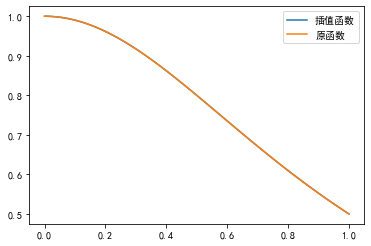

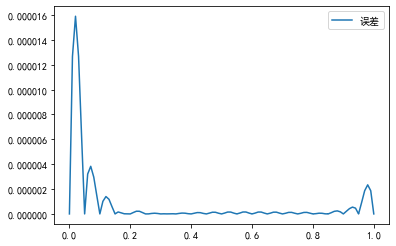

[1.26888786e-05]
[1.86244019e-06]


In [50]:
import math
import numpy as np
import matplotlib.pyplot  as plt
from sympy import *
from pylab import mpl

def func(y):
    y = np.float64(y)
    return 1/(1 + y * y)

def draw_pic1(x, y):
    fig=plt.figure()
    plt.plot(x, y, label='插值函数')
    plt.plot(x, func(x), label='原函数')
    plt.legend()
    plt.show()
    
def draw_pic2(x, y):
    fig=plt.figure()
    plt.plot(x, np.fabs(y-func(x)), label='误差')
    plt.legend()
    plt.show()

def spline3_Parameters(x_vec):
        parameter = []
        size_of_Interval = len(x_vec) - 1;
        i = 1
        
        while i < len(x_vec) - 1:
            data = np.zeros(size_of_Interval * 4)
            data[(i - 1) * 4] = x_vec[i] * x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 1] = x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 2] = x_vec[i]
            data[(i - 1) * 4 + 3] = 1
            data1 = np.zeros(size_of_Interval * 4)
            data1[i * 4] = x_vec[i] * x_vec[i] * x_vec[i]
            data1[i * 4 + 1] = x_vec[i] * x_vec[i]
            data1[i * 4 + 2] = x_vec[i]
            data1[i * 4 + 3] = 1

            parameter.append(data)
            parameter.append(data1)
            i += 1
        
        data = np.zeros(size_of_Interval * 4)
        data[0] = x_vec[0] * x_vec[0] * x_vec[0]
        data[1] = x_vec[0] * x_vec[0]
        data[2] = x_vec[0]
        data[3] = 1
        parameter.append(data)

        data = np.zeros(size_of_Interval * 4)
        data[(size_of_Interval - 1) * 4] = x_vec[-1] * x_vec[-1] * x_vec[-1]
        data[(size_of_Interval - 1) * 4 + 1] = x_vec[-1] * x_vec[-1]
        data[(size_of_Interval - 1) * 4 + 2] = x_vec[-1]
        data[(size_of_Interval - 1) * 4 + 3] = 1
        parameter.append(data)
        
        i = 1
        while i < size_of_Interval:
            data = np.zeros(size_of_Interval * 4)
            data[(i - 1) * 4] = 3 * x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 1] = 2 * x_vec[i]
            data[(i - 1) * 4 + 2] = 1
            data[i * 4] = -3 * x_vec[i] * x_vec[i]
            data[i * 4 + 1] = -2 * x_vec[i]
            data[i * 4 + 2] = -1
            parameter.append(data)
            i += 1
        
        i = 1
        while i < len(x_vec) - 1:
            data = np.zeros(size_of_Interval * 4)
            data[(i - 1) * 4] = 6 * x_vec[i]
            data[(i - 1) * 4 + 1] = 2
            data[i * 4] = -6 * x_vec[i]
            data[i * 4 + 1] = -2
            parameter.append(data)
            i += 1
        #the other two equations
        data = np.zeros(size_of_Interval * 4)
        data[0] = 6
        data[4] = 6
        parameter.append(data)
        data = np.zeros(size_of_Interval * 4)
        data[-8] = 6
        data[-4] = 6
        parameter.append(data)
        return parameter

def solution_of_equation(parametes, x):
        size_of_Interval = len(x) - 1;
        result = np.zeros(size_of_Interval * 4)
        i = 1
        while i < size_of_Interval:
            result[(i - 1) * 2] = func(x[i])
            result[(i - 1) * 2 + 1] = func(x[i])
            i += 1
        result[(size_of_Interval - 1) * 2] = func(x[0])
        result[(size_of_Interval - 1) * 2 + 1] = func(x[-1])
        result[-2] = 0
        result[-1] = 0
        a = np.array(spline3_Parameters(x))
        b = np.array(result)
        #print(b)
        return np.linalg.solve(a, b)

def calculate(paremeters, x):
        result = []
        for data_x in x:
            result.append(
                paremeters[0] * data_x * data_x * data_x + paremeters[1] * data_x * data_x + paremeters[2] * data_x +
                paremeters[3])
        return result

x_init4 = np.arange(0, 1.01, 0.05)
result = solution_of_equation(spline3_Parameters(x_init4), x_init4)
#print(spline3_Parameters(x_init4))
#print(result)
x_axis4 = []
y_axis4 = []
for i in range(20):
    temp = np.arange(i/20, 0.05 + i/20, 0.01)
    x_axis4 = np.append(x_axis4, temp)
    y_axis4 = np.append(y_axis4, calculate(
        [result[4 * i], result[1 + 4 * i], result[2 + 4 * i], result[3 + 4 * i]], temp))
draw_pic1(x_axis4, y_axis4)
draw_pic2(x_axis4, y_axis4)
print(np.fabs([result[4 * 0] * 0.03**3 + result[1 + 4 * 0] * 0.03**2 + 
               result[2 + 4 * 0] * 0.03 + result[3 + 4 * 0]] - func(0.03)))
print(np.fabs([result[4 * 19] * 0.97**3 + result[1 + 4 * 19] * 0.97**2 + 
               result[2 + 4 * 19] * 0.97 + result[3 + 4 * 19]] - func(0.97)))

In [ ]:
        #端点处的函数值的二阶导数为原函数的二阶导数
        data = np.zeros(size_of_Interval * 4)
        data[0] = 6 * x_vec[0]
        data[1] = 2
        parameter.append(data)
        data = np.zeros(size_of_Interval * 4)
        data[-4] = 6 * x_vec[-1]
        data[-3] = 2
        parameter.append(data)
        result[-2] = 0
        result[-1] = 0
        
        data[(i - 1) * 4] = 3 * x_vec[i] * x_vec[i]
            data[(i - 1) * 4 + 1] = 2 * x_vec[i]
            data[(i - 1) * 4 + 2] = 1